## <b> [3단계] AI 모델링
---

## 1, 2 단계에서 진행하신 내용을 아래에 그대로 진행해주세요.

---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [1]:
#Tensorflow 설치하기

* 데이터 프레임 관련 라이브러리

In [2]:
#라이브러리 불러오기
import pandas as pd
import numpy as np

### **나.  학습데이터 불러오기**

In [215]:
df = pd.read_csv('data.csv')
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1,hyphens_ratio,total_tag
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1,0.000000,9.0
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1,0.000000,61.0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,101.0,1.0,1.0,3.0,70.0,1,0.000000,210.0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1,0.000000,224.0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1,0.074074,665.0


In [204]:
df1 = pd.read_csv('data1.csv')
df1.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1,hyphens_ratio,total_tag
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1,0.000000,9.0
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1,0.000000,61.0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,101.0,1.0,1.0,3.0,70.0,1,0.000000,210.0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1,0.000000,224.0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1,0.074074,665.0


In [216]:
df = df.drop(['hyphens_ratio', 'total_tag'], axis=1)

### **다.  데이터 전처리**

In [226]:
# x, y 분할
target = 'Result_v1'

x = df.drop(target, axis=1)
y = df.loc[:, target]

In [227]:
y = y.map({-1 : 1, 1 : 0})

### **라. train_test_split을 이용하여 train/test  데이터 분리**



In [228]:
from sklearn.model_selection import train_test_split

In [229]:
# train_test_split 사용
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=2022)

In [221]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

### **마. Confusion Matrix 함수 정의**


#### Confusion Matrix란 Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표입니다.
#### 아래 함수는 이번 과제에서 confusion matrix 결과를 보기 쉽게 표현한 것으로 사용 예를 참고하여 모델 결과 확인에 사용하시기 바랍니다.



**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [8]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [236]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### <span style="color:blue">[예시] Confusion Matrix 사용 방법<span>

- 샘플
#### > confusion = confusion_matrix(test_y, dt_pred)
#### > fig, ax = plt.subplots(figsize=(10,3))
#### > plot_confusion_matrix(ax, confusion, fontsize=30)


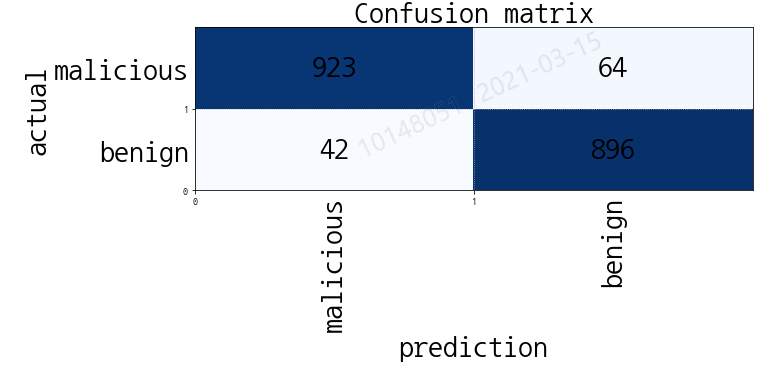

---

## <b> Q. AI 분류 모델 만들기

* 전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는 AI 분류 모델을 <font color="red">최소 3개 이상 </font>만들어보세요.

## 1) XGBoost

In [10]:
# 1. import
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [11]:
# 2.선언 
params = {'max_depth' : range(3, 11), 'n_estimators' : range(20, 200, 10), 
          'learning_rate' : [0.01, 0.02, 0.03, 0.1, 0.2]}
xgb = XGBClassifier()
model_xgb = GridSearchCV(xgb, params, cv=5, verbose=3)

In [12]:
# 3. fit(), 학습
model_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=20; total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=20; total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=20; total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=20; total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=20; total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=30; total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=30; total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=30; total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=30; total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=30; total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=40; total time=   0.0s
[CV 2/5] END learning_rate=0.01, m

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [135]:
model_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=20; total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=20; total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=20; total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=20; total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=20; total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=30; total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=30; total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=30; total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=30; total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=30; total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=40; total time=   0.0s
[CV 2/5] END learning_rate=0.01, m

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [13]:
print(model_xgb.best_params_)
print(model_xgb.best_score_)

{'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 70}
0.954878001133056


In [137]:
print(model_xgb.best_params_)
print(model_xgb.best_score_)

{'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 60}
0.9536013596671159


In [14]:
# 4. predict(), 예측
pred_xgb = model_xgb.predict(x_val)

In [15]:
# train 및 val 데이터 정확도 확인 
print(creport(pred_xgb, y_val))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       473
           1       0.95      0.94      0.95       497

    accuracy                           0.95       970
   macro avg       0.95      0.95      0.95       970
weighted avg       0.95      0.95      0.95       970



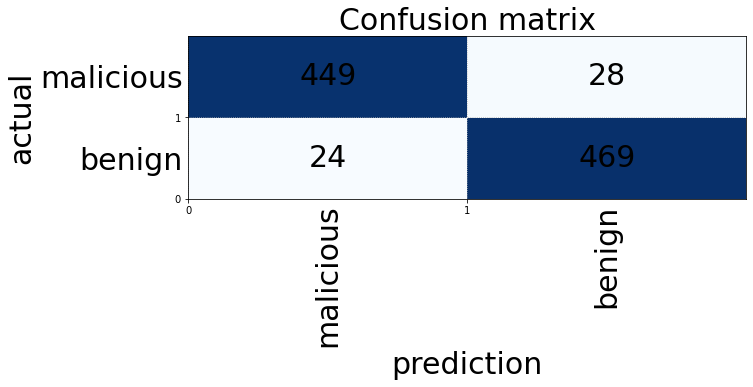

In [16]:
# Test 데이터 결과 Confusion Matrix 확인
import matplotlib.pyplot as plt

confusion = confusion_matrix(y_val, pred_xgb)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

In [17]:
import seaborn as sns

def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

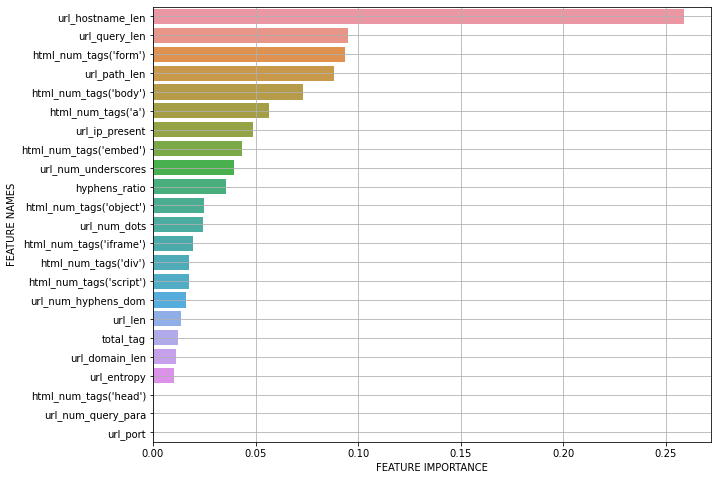

In [18]:
# Feature(특징)별 가중치 확인
result = plot_feature_importance(model_xgb.best_estimator_.feature_importances_, x_train.columns)

## 2) RandomForest

In [19]:
# 1. import
from sklearn.ensemble import RandomForestClassifier

In [230]:
# 2.선언 
params2 = {'n_estimators' : range(20, 201, 10), 'max_features' : range(1, x.shape[1]+1)}
rf = RandomForestClassifier(max_features=5, n_estimators=120)
model_rf = GridSearchCV(rf, params2, cv=5, verbose=3)

In [212]:
# 3. fit(), 학습
model_rf.fit(x_train, y_train)

Fitting 5 folds for each of 399 candidates, totalling 1995 fits
[CV 1/5] END ................max_features=1, n_estimators=20; total time=   0.0s
[CV 2/5] END ................max_features=1, n_estimators=20; total time=   0.0s
[CV 3/5] END ................max_features=1, n_estimators=20; total time=   0.0s
[CV 4/5] END ................max_features=1, n_estimators=20; total time=   0.0s
[CV 5/5] END ................max_features=1, n_estimators=20; total time=   0.0s
[CV 1/5] END ................max_features=1, n_estimators=30; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 2/5] END ................max_features=1, n_estimators=30; total time=   0.0s
[CV 3/5] END ................max_features=1, n_estimators=30; total time=   0.0s
[CV 4/5] END ................max_features=1, n_estimators=30; total time=   0.0s
[CV 5/5] END ................max_features=1, n_estimators=30; total time=   0.0s
[CV 1/5] END ................max_features=1, n_estimators=40; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 2/5] END ................max_features=1, n_estimators=40; total time=   0.0s
[CV 3/5] END ................max_features=1, n_estimators=40; total time=   0.0s
[CV 4/5] END ................max_features=1, n_estimators=40; total time=   0.0s
[CV 5/5] END ................max_features=1, n_estimators=40; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 1/5] END ................max_features=1, n_estimators=50; total time=   0.1s
[CV 2/5] END ................max_features=1, n_estimators=50; total time=   0.0s
[CV 3/5] END ................max_features=1, n_estimators=50; total time=   0.0s
[CV 4/5] END ................max_features=1, n_estimators=50; total time=   0.0s
[CV 5/5] END ................max_features=1, n_estimators=50; total time=   0.0s
[CV 1/5] END ................max_features=1, n_estimators=60; total time=   0.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  F

[CV 2/5] END ................max_features=1, n_estimators=60; total time=   0.0s
[CV 3/5] END ................max_features=1, n_estimators=60; total time=   0.0s
[CV 4/5] END ................max_features=1, n_estimators=60; total time=   0.0s
[CV 5/5] END ................max_features=1, n_estimators=60; total time=   0.0s
[CV 1/5] END ................max_features=1, n_estimators=70; total time=   0.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  F

[CV 2/5] END ................max_features=1, n_estimators=70; total time=   0.0s
[CV 3/5] END ................max_features=1, n_estimators=70; total time=   0.0s
[CV 4/5] END ................max_features=1, n_estimators=70; total time=   0.0s
[CV 5/5] END ................max_features=1, n_estimators=70; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 1/5] END ................max_features=1, n_estimators=80; total time=   0.1s
[CV 2/5] END ................max_features=1, n_estimators=80; total time=   0.0s
[CV 3/5] END ................max_features=1, n_estimators=80; total time=   0.0s
[CV 4/5] END ................max_features=1, n_estimators=80; total time=   0.0s
[CV 5/5] END ................max_features=1, n_estimators=80; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 1/5] END ................max_features=1, n_estimators=90; total time=   0.2s
[CV 2/5] END ................max_features=1, n_estimators=90; total time=   0.0s
[CV 3/5] END ................max_features=1, n_estimators=90; total time=   0.0s
[CV 4/5] END ................max_features=1, n_estimators=90; total time=   0.0s
[CV 5/5] END ................max_features=1, n_estimators=90; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 1/5] END ...............max_features=1, n_estimators=100; total time=   0.3s
[CV 2/5] END ...............max_features=1, n_estimators=100; total time=   0.0s
[CV 3/5] END ...............max_features=1, n_estimators=100; total time=   0.0s
[CV 4/5] END ...............max_features=1, n_estimators=100; total time=   0.0s
[CV 5/5] END ...............max_features=1, n_estimators=100; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 1/5] END ...............max_features=1, n_estimators=110; total time=   0.3s
[CV 2/5] END ...............max_features=1, n_estimators=110; total time=   0.0s
[CV 3/5] END ...............max_features=1, n_estimators=110; total time=   0.0s
[CV 4/5] END ...............max_features=1, n_estimators=110; total time=   0.0s
[CV 5/5] END ...............max_features=1, n_estimators=110; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 1/5] END ...............max_features=1, n_estimators=120; total time=   0.4s
[CV 2/5] END ...............max_features=1, n_estimators=120; total time=   0.0s
[CV 3/5] END ...............max_features=1, n_estimators=120; total time=   0.0s
[CV 4/5] END ...............max_features=1, n_estimators=120; total time=   0.0s
[CV 5/5] END ...............max_features=1, n_estimators=120; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 1/5] END ...............max_features=1, n_estimators=130; total time=   0.3s
[CV 2/5] END ...............max_features=1, n_estimators=130; total time=   0.0s
[CV 3/5] END ...............max_features=1, n_estimators=130; total time=   0.0s
[CV 4/5] END ...............max_features=1, n_estimators=130; total time=   0.0s
[CV 5/5] END ...............max_features=1, n_estimators=130; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 1/5] END ...............max_features=1, n_estimators=140; total time=   0.5s
[CV 2/5] END ...............max_features=1, n_estimators=140; total time=   0.0s
[CV 3/5] END ...............max_features=1, n_estimators=140; total time=   0.0s
[CV 4/5] END ...............max_features=1, n_estimators=140; total time=   0.0s
[CV 5/5] END ...............max_features=1, n_estimators=140; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 1/5] END ...............max_features=1, n_estimators=150; total time=   0.5s
[CV 2/5] END ...............max_features=1, n_estimators=150; total time=   0.0s
[CV 3/5] END ...............max_features=1, n_estimators=150; total time=   0.0s
[CV 4/5] END ...............max_features=1, n_estimators=150; total time=   0.0s
[CV 5/5] END ...............max_features=1, n_estimators=150; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 1/5] END ...............max_features=1, n_estimators=160; total time=   0.5s
[CV 2/5] END ...............max_features=1, n_estimators=160; total time=   0.0s
[CV 3/5] END ...............max_features=1, n_estimators=160; total time=   0.0s
[CV 4/5] END ...............max_features=1, n_estimators=160; total time=   0.0s
[CV 5/5] END ...............max_features=1, n_estimators=160; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 1/5] END ...............max_features=1, n_estimators=170; total time=   0.6s
[CV 2/5] END ...............max_features=1, n_estimators=170; total time=   0.0s
[CV 3/5] END ...............max_features=1, n_estimators=170; total time=   0.0s
[CV 4/5] END ...............max_features=1, n_estimators=170; total time=   0.0s
[CV 5/5] END ...............max_features=1, n_estimators=170; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 1/5] END ...............max_features=1, n_estimators=180; total time=   0.5s
[CV 2/5] END ...............max_features=1, n_estimators=180; total time=   0.0s
[CV 3/5] END ...............max_features=1, n_estimators=180; total time=   0.0s
[CV 4/5] END ...............max_features=1, n_estimators=180; total time=   0.0s
[CV 5/5] END ...............max_features=1, n_estimators=180; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 1/5] END ...............max_features=1, n_estimators=190; total time=   0.6s
[CV 2/5] END ...............max_features=1, n_estimators=190; total time=   0.0s
[CV 3/5] END ...............max_features=1, n_estimators=190; total time=   0.0s
[CV 4/5] END ...............max_features=1, n_estimators=190; total time=   0.0s
[CV 5/5] END ...............max_features=1, n_estimators=190; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 1/5] END ...............max_features=1, n_estimators=200; total time=   0.6s
[CV 2/5] END ...............max_features=1, n_estimators=200; total time=   0.0s
[CV 3/5] END ...............max_features=1, n_estimators=200; total time=   0.0s
[CV 4/5] END ...............max_features=1, n_estimators=200; total time=   0.0s
[CV 5/5] END ...............max_features=1, n_estimators=200; total time=   0.0s
[CV 1/5] END ................max_features=2, n_estimators=20; total time=   0.0s
[CV 2/5] END ................max_features=2, n_estimators=20; total time=   0.0s
[CV 3/5] END ................max_features=2, n_estimators=20; total time=   0.0s
[CV 4/5] END ................max_features=2, n_estimators=20; total time=   0.0s
[CV 5/5] END ................max_features=2, n_estimators=20; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 1/5] END ................max_features=2, n_estimators=30; total time=   0.0s
[CV 2/5] END ................max_features=2, n_estimators=30; total time=   0.0s
[CV 3/5] END ................max_features=2, n_estimators=30; total time=   0.0s
[CV 4/5] END ................max_features=2, n_estimators=30; total time=   0.0s
[CV 5/5] END ................max_features=2, n_estimators=30; total time=   0.0s
[CV 1/5] END ................max_features=2, n_estimators=40; total time=   0.0s
[CV 2/5] END ................max_features=2, n_estimators=40; total time=   0.0s
[CV 3/5] END ................max_features=2, n_estimators=40; total time=   0.0s
[CV 4/5] END ................max_features=2, n_estimators=40; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  F

[CV 5/5] END ................max_features=2, n_estimators=40; total time=   0.0s
[CV 1/5] END ................max_features=2, n_estimators=50; total time=   0.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  F

[CV 2/5] END ................max_features=2, n_estimators=50; total time=   0.0s
[CV 3/5] END ................max_features=2, n_estimators=50; total time=   0.0s
[CV 4/5] END ................max_features=2, n_estimators=50; total time=   0.0s
[CV 5/5] END ................max_features=2, n_estimators=50; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 1/5] END ................max_features=2, n_estimators=60; total time=   0.1s
[CV 2/5] END ................max_features=2, n_estimators=60; total time=   0.0s
[CV 3/5] END ................max_features=2, n_estimators=60; total time=   0.0s
[CV 4/5] END ................max_features=2, n_estimators=60; total time=   0.0s
[CV 5/5] END ................max_features=2, n_estimators=60; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 1/5] END ................max_features=2, n_estimators=70; total time=   0.2s
[CV 2/5] END ................max_features=2, n_estimators=70; total time=   0.0s
[CV 3/5] END ................max_features=2, n_estimators=70; total time=   0.0s
[CV 4/5] END ................max_features=2, n_estimators=70; total time=   0.0s
[CV 5/5] END ................max_features=2, n_estimators=70; total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 630, in predict
    proba = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 674, in predict_proba
    X = self._validate_X_predict(X)
  File

[CV 1/5] END ................max_features=2, n_estimators=80; total time=   0.2s
[CV 2/5] END ................max_features=2, n_estimators=80; total time=   0.0s
[CV 3/5] END ................max_features=2, n_estimators=80; total time=   0.0s
[CV 4/5] END ................max_features=2, n_estimators=80; total time=   0.0s
[CV 5/5] END ................max_features=2, n_estimators=80; total time=   0.0s


KeyboardInterrupt: 

In [225]:
df = df.dropna()

In [231]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=120)

In [22]:
print(model_rf.best_params_)
print(model_rf.best_score_)

{'max_features': 5, 'n_estimators': 120}
0.9570923440582938


In [23]:
# 4. predict(), 예측
pred_rf = model_rf.predict(x_val)

In [237]:
pred_rf1 = rf.predict(x_val)

In [238]:
# train 및 val 데이터 정확도 확인 
print(creport(pred_rf1, y_val))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       471
           1       0.95      0.94      0.95       499

    accuracy                           0.95       970
   macro avg       0.95      0.95      0.95       970
weighted avg       0.95      0.95      0.95       970



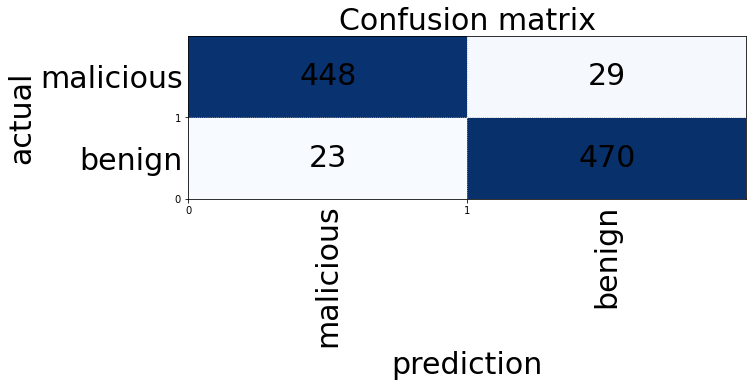

In [239]:
# Test 데이터 결과 Confusion Matrix 확인
confusion = confusion_matrix(y_val, pred_rf1)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

In [235]:
# Test 데이터 결과 Confusion Matrix 확인
confusion = confusion_matrix(y_val, rf)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

TypeError: Expected sequence or array-like, got <class 'sklearn.ensemble._forest.RandomForestClassifier'>

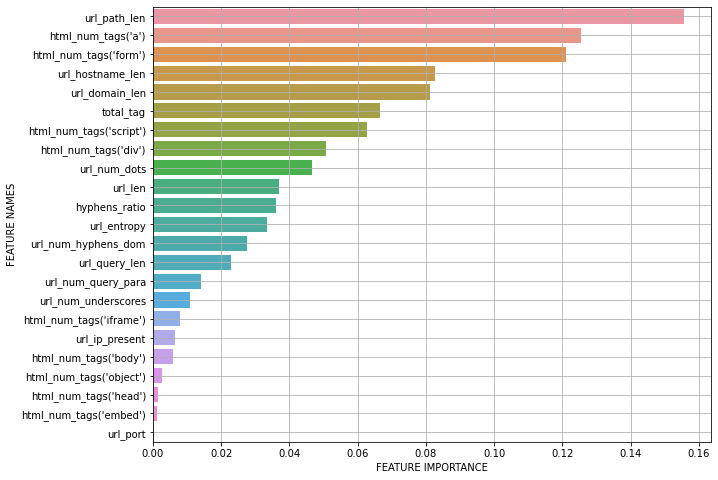

In [26]:
# Feature(특징)별 가중치 확인
result = plot_feature_importance(model_rf.best_estimator_.feature_importances_, x_train.columns)

#### 테스트 셋 데이터 정리

In [ ]:
test = pd.

In [193]:
df = df.drop(['hyphens_ratio', 'total_tag'], axis=1)
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,1.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1


## 3) Logistic Regrssion

In [27]:
from sklearn.linear_model import LogisticRegression

# 아래 함수는 로지스틱 회귀를 위한 전진선택법 함수 입니다.
import statsmodels.api as sm

def forward_stepwise_logistic(x_train, y_train):

    # 변수목록, 선택된 변수 목록, 단계별 모델과 AIC 저장소 정의
    features = list(x_train)
    selected = []
    step_df = pd.DataFrame({ 'step':[], 'feature':[],'aic':[]})

    # 
    for s in range(0, len(features)) :
        result =  { 'step':[], 'feature':[],'aic':[]}

        # 변수 목록에서 변수 한개씩 뽑아서 모델에 추가
        for f in features :
            vars = selected + [f]
            x_tr = x_train[vars]
            model = sm.Logit(y_train, x_tr).fit()
            result['step'].append(s+1)
            result['feature'].append(vars)
            result['aic'].append(model.aic)
        
        # 모델별 aic 집계
        temp = pd.DataFrame(result).sort_values('aic').reset_index(drop = True)

        # 만약 이전 aic보다 새로운 aic 가 크다면 멈추기
        if step_df['aic'].min() < temp['aic'].min() :
            break
        step_df = pd.concat([step_df, temp], axis = 0).reset_index(drop = True)

        # 선택된 변수 제거
        v = temp.loc[0,'feature'][s]
        features.remove(v)

        selected.append(v)
    
    # 선택된 변수와 step_df 결과 반환
    return selected, step_df

In [28]:
var, step_df = forward_stepwise_logistic(x_train, y_train)

Optimization terminated successfully.
         Current function value: 0.693042
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.628452
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.684549
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.680422
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680000
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692424
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682959
         Iterations 6
         Current function value: 0.649002
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.656053
         Iterations 24


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


LinAlgError: Singular matrix

In [77]:
var

NameError: name 'var' is not defined

In [29]:
model_lr = LogisticRegression()

In [30]:
model_lr.fit(x_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
pred_lr = model_lr.predict(x_val)

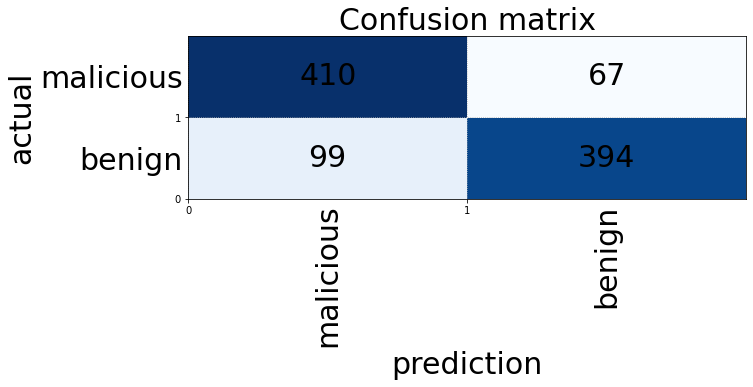

In [33]:
# Test 데이터 결과 Confusion Matrix 확인
confusion = confusion_matrix(y_val, pred_lr)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

## 4) DT

In [34]:
# 1. import
from sklearn.tree import DecisionTreeClassifier

In [35]:
# 2.선언 
params = {'max_depth' : range(3, 16), 'min_samples_leaf' : range(10, 101, 10)}
dt = DecisionTreeClassifier()
model_dt = GridSearchCV(dt, params, cv=5, verbose=3)

In [36]:
# 3. fit(), 학습
model_dt.fit(x_train, y_train)

Fitting 5 folds for each of 130 candidates, totalling 650 fits
[CV 1/5] END ...............max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV 2/5] END ...............max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV 3/5] END ...............max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV 4/5] END ...............max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV 5/5] END ...............max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV 1/5] END ...............max_depth=3, min_samples_leaf=20; total time=   0.0s
[CV 2/5] END ...............max_depth=3, min_samples_leaf=20; total time=   0.0s
[CV 3/5] END ...............max_depth=3, min_samples_leaf=20; total time=   0.0s
[CV 4/5] END ...............max_depth=3, min_samples_leaf=20; total time=   0.0s
[CV 5/5] END ...............max_depth=3, min_samples_leaf=20; total time=   0.0s
[CV 1/5] END ...............max_depth=3, min_samples_leaf=30; total time=   0.0s
[CV 2/5] END ...............max_depth=3, min_s

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(3, 16),
                         'min_samples_leaf': range(10, 101, 10)},
             verbose=3)

In [37]:
print(model_dt.best_params_)
print(model_dt.best_score_)

{'max_depth': 9, 'min_samples_leaf': 10}
0.9137519779640156


In [38]:
# 4. predict(), 예측
pred_dt = model_dt.predict(x_val)

In [40]:
# train 및 val 데이터 정확도 확인 
print(creport(pred_dt, y_val))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       474
           1       0.91      0.90      0.90       496

    accuracy                           0.90       970
   macro avg       0.90      0.90      0.90       970
weighted avg       0.90      0.90      0.90       970



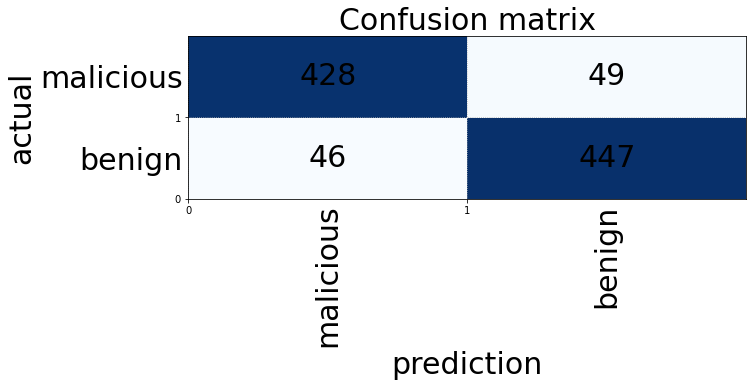

In [41]:
# Test 데이터 결과 Confusion Matrix 확인
import matplotlib.pyplot as plt

confusion = confusion_matrix(y_val, pred_dt)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

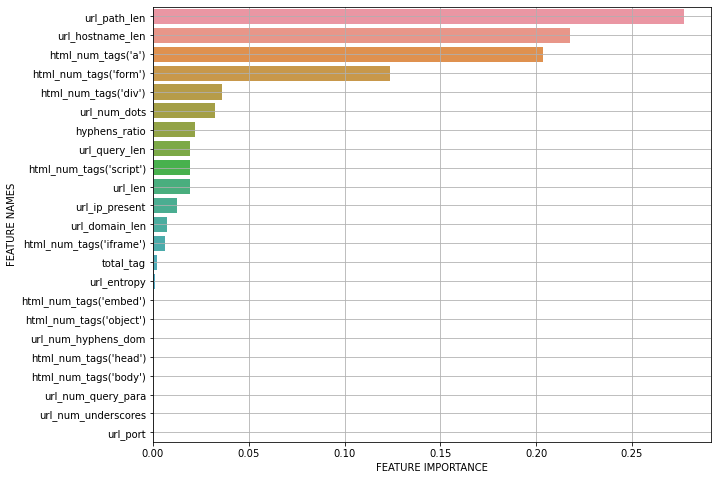

In [42]:
# Feature(특징)별 가중치 확인
result = plot_feature_importance(model_dt.best_estimator_.feature_importances_, x_train.columns)

## 5) SVM

In [43]:
# 1. import
from sklearn.svm import SVC

In [44]:
# 2.선언 
params = {'C' : [0.1, 0.5, 1, 1.5, 2], 'gamma' : [0.1, 0.5, 1, 1.5, 2]}
svc = SVC()
model_svc = GridSearchCV(svc, params, cv=5, verbose=3)

In [49]:
# 3. fit(), 학습
model_svc.fit(x_train_s, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.2s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.2s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.2s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.2s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.2s
[CV 1/5] END ...............................C=0.1, gamma=0.5; total time=   0.2s
[CV 2/5] END ...............................C=0.1, gamma=0.5; total time=   0.3s
[CV 3/5] END ...............................C=0.1, gamma=0.5; total time=   0.2s
[CV 4/5] END ...............................C=0.1, gamma=0.5; total time=   0.2s
[CV 5/5] END ...............................C=0.1, gamma=0.5; total time=   0.2s
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.2s
[CV 2/5] END .................................C

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 1.5, 2],
                         'gamma': [0.1, 0.5, 1, 1.5, 2]},
             verbose=3)

In [50]:
print(model_svc.best_params_)
print(model_svc.best_score_)

{'C': 2, 'gamma': 2}
0.8107112856277716


In [51]:
# 4. predict(), 예측
pred_svc = model_svc.predict(x_val_s)

In [55]:
# train 및 val 데이터 정확도 확인 
print(creport(pred_svc, y_val))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       547
           1       0.76      0.89      0.82       423

    accuracy                           0.83       970
   macro avg       0.83      0.84      0.83       970
weighted avg       0.84      0.83      0.83       970



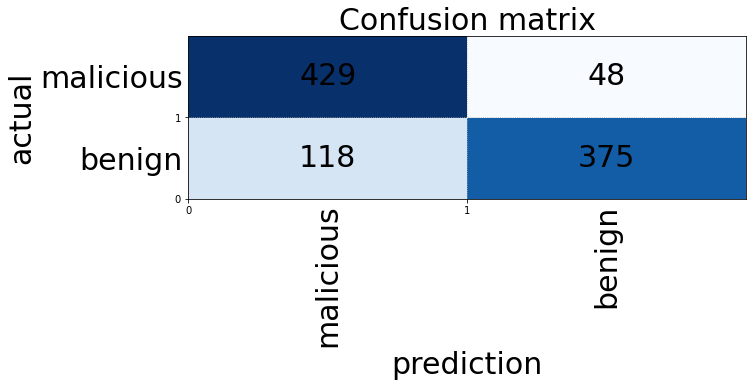

In [56]:
# Test 데이터 결과 Confusion Matrix 확인
import matplotlib.pyplot as plt

confusion = confusion_matrix(y_val, pred_svc)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

In [58]:
# stacking

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [60]:
params = {'n_neighbors' : range(1, 51)}
knn = KNeighborsClassifier()
model_knn = GridSearchCV(knn, params, cv=5, verbose=3)
model_knn.fit(x_train_s, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ..................................n_neighbors=1; total time=   0.0s
[CV 2/5] END ..................................n_neighbors=1; total time=   0.0s
[CV 3/5] END ..................................n_neighbors=1; total time=   0.0s
[CV 4/5] END ..................................n_neighbors=1; total time=   0.0s
[CV 5/5] END ..................................n_neighbors=1; total time=   0.0s
[CV 1/5] END ..................................n_neighbors=2; total time=   0.0s
[CV 2/5] END ..................................n_neighbors=2; total time=   0.0s
[CV 3/5] END ..................................n_neighbors=2; total time=   0.0s
[CV 4/5] END ..................................n_neighbors=2; total time=   0.0s
[CV 5/5] END ..................................n_neighbors=2; total time=   0.0s
[CV 1/5] END ..................................n_neighbors=3; total time=   0.0s
[CV 2/5] END ..................................

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)}, verbose=3)

In [61]:
print(model_knn.best_params_)
print(model_knn.best_score_)

{'n_neighbors': 6}
0.8562523198343394


In [78]:
# 개별 ML 모델 객체 생성 (기반모델)
#knn_clf = KNeighborsClassifier(n_neighbors=6)
rf_clf = RandomForestClassifier(max_features=5, n_estimators=120)
dt_clf = DecisionTreeClassifier(max_depth=9, min_samples_leaf=10)
xgb_clf = XGBClassifier(learning_rate=0.2, max_depth=9, n_estimators=70)
#svm_clf = SVC(C=2, gamma=2)

# 메타모델(스태킹으로 만들어진 데이터 학습 및 예측)
rf_final = RandomForestClassifier(max_features=5, n_estimators=120)

In [80]:
rf_clf.fit(x_train, y_train)
dt_clf.fit(x_train, y_train)
xgb_clf.fit(x_train, y_train)
#svm_clf.fit(x_train_s, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=70, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [136]:
xgb_pred = xgb_clf.predict(x_val)
rf_pred = rf_clf.predict(x_val)
dt_pred = dt_clf.predict(x_val)
#svm_pred = svm_clf.predict(x_val_s)

print('XGB 정확도 :',accuracy_score(y_val, xgb_pred))
print('RF 정확도 :',accuracy_score(y_val, rf_pred))
print('DT 정확도 :',accuracy_score(y_val, dt_pred))
#print('ADA부스트 정확도 :',accuracy_score(y_val, svm_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [90]:
# 기반 모델의 예측 결과를 스태킹

stacked_pred = np.array([xgb_pred, rf_pred])
print(stacked_pred.shape)

# transpose를 이용, 행과 열의 위치를 교환, 칼럼 레벨로 각 모델의 예측 결과를 피처로 사용

stacked_pred = np.transpose(stacked_pred)
print(stacked_pred.shape)

(2, 970)
(970, 2)


In [91]:
# 메타 모델은 기반모델의 예측결과를 기반으로 학습

dt_clf.fit(stacked_pred, y_val)
final_pred = dt_clf.predict(stacked_pred)

print('최종 메타 모델 정확도 : ',accuracy_score(y_val, final_pred))

최종 메타 모델 정확도 :  0.9474226804123711


In [253]:
test = pd.read_csv('test_prep4.csv')

In [241]:
test = test.drop('range_url', axis=1)

In [254]:
x_train.shape, test.shape

((2261, 21), (2441, 21))

In [243]:
test = test.drop(['hyphens_ratio', 'total_tag'], axis=1)

In [255]:
x_test = test

In [256]:
# 4. predict(), 예측
pred_rf = rf.predict(x_test)

In [183]:
pred_rf = model_xgb.predict(x_test)

In [257]:
# train 및 val 데이터 정확도 확인 
print(pred_rf)

[0 0 0 ... 0 1 1]


In [258]:
for i in range(len(pred_rf)):
    if pred_rf[i] == 1:
        pred_rf[i] = -1
    else: pred_rf[i] = 1

In [259]:
print(pred_rf)

[ 1  1  1 ...  1 -1 -1]


In [260]:
data = pd.DataFrame(pred_rf, columns=['expected'])
data['id'] = data.index

In [261]:
data = data[['id', 'expected']]

In [262]:
data

,id,expected
0,0,1
1,1,1
2,2,1
3,3,-1
4,4,1
...,...,...
2436,2436,1
2437,2437,-1
2438,2438,1
2439,2439,-1


In [263]:
data.to_csv('submission7.csv', index=False)

In [123]:
pred_xgb1 = model_xgb.predict(x_test)

In [124]:
pred_xgb1

array([1, 0, 0, ..., 0, 0, 0])

In [125]:
for i in range(len(pred_xgb1)):
    if pred_xgb1[i] == 1:
        pred_xgb1[i] = -1
    else: pred_xgb1[i] = 1

In [126]:
data1 = pd.DataFrame(pred_xgb1, columns=['expected'])
data1['id'] = data1.index

In [127]:
data1 = data1[['id', 'expected']]

In [128]:
data1.to_csv('submission2.csv', index=False)